In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pxe

import pandas as pd
import numpy as np

# EDA

In [42]:
df = pd.read_csv("Datasets\data_with_0.csv", index_col=0)
fe_threshold = -1
df = df[df["FE, %"] > fe_threshold]

In [43]:
df.columns

Index(['DOI', 'Article name', 'Formula', 'Cat. compound', 'Support',
       'Cat./Support ratio, % (at)', 'Morphology (TEM/SEM)', 'Pore size, nm',
       'width min (nm)', 'width aver (nm)', 'width max (nm)',
       'length min (nm)', 'length aver (nm)', 'length max (nm)', 'Cu, % (at.)',
       'Cu+, % (at.)', 'Cu(2+), % (at.)', 'Base', 'electrolyte', 'conc, M',
       'pH', 'RHE vs V', 'Time, h', 'Type of reactor', 'Av_ar_exactmw',
       'Av_ar_lipinskiHBA', 'Av_ar_lipinskiHBD', 'Av_ar_NumHBA',
       'Av_ar_NumHeavyAtoms', 'Av_harm_labuteASA', 'Av_harm_CrippenClogP',
       'Av_harm_kappa1', 'Av_harm_kappa3', 'Av_harm_Energy of +1 ion',
       'Av_harm_Metal_radius', 'Product', 'FE, %'],
      dtype='object')

In [44]:
df["Product"].unique()

array(['H2', 'CO', 'C2H4', 'C2H5OH', 'CH4', 'HCOOH', 'C3H7OH', 'CH3OH',
       'CH3COOH'], dtype=object)

As dataset contains different types of products, it is better to split EDA by different products. We will research 3 main products: C2H4, H2, CO, CH4

## C2H4

<Axes: >

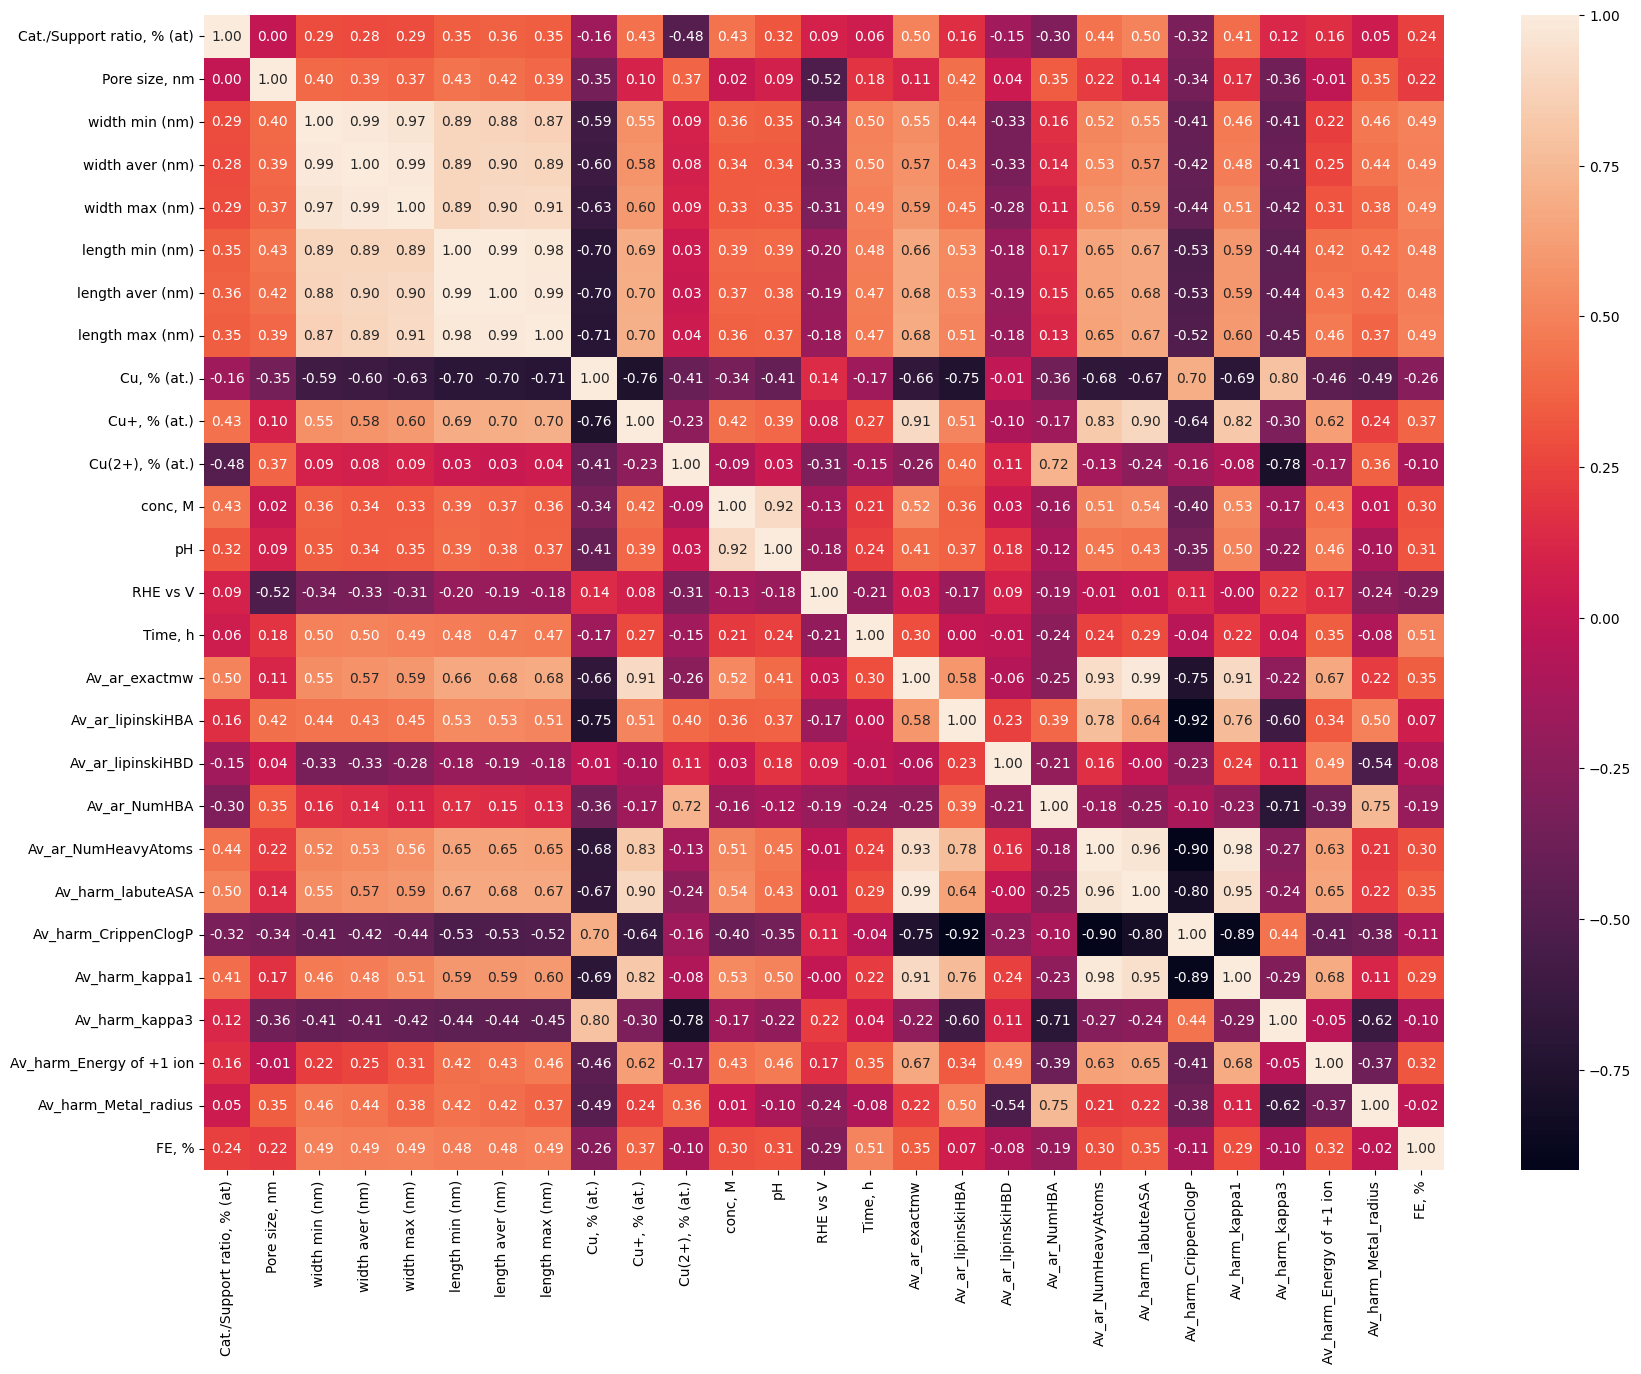

In [45]:
df_c2h4 = df[df['Product'] == "C2H4"].copy()
num_col = df_c2h4.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(20,15))
sns.heatmap(data=df_c2h4[num_col].corr(method="spearman"), annot=True, fmt=".2f", annot_kws={"size": 10})

1. It can be detected that Effeciency of obtaining C2H4 is negatively correlated this potential of system
2. Cu+ favour the obtaining the C2H4
3. There is a pretty good correlation between geometric size of particles and FE %

In [46]:
size_max_default =5
scaling_factor = 3
pxe.scatter(data_frame=df_c2h4, x="RHE vs V", y="FE, %",  size=df_c2h4['Av_harm_Energy of +1 ion'] -7, size_max=size_max_default*scaling_factor)

No clear dependence can be seen, but it can be assumed that metals with higher ionisation energy tend to have higher efficiencies

In [47]:
fe_c2h4 = df_c2h4[num_col].corr(method="spearman")["FE, %"]

## H2

<Axes: >

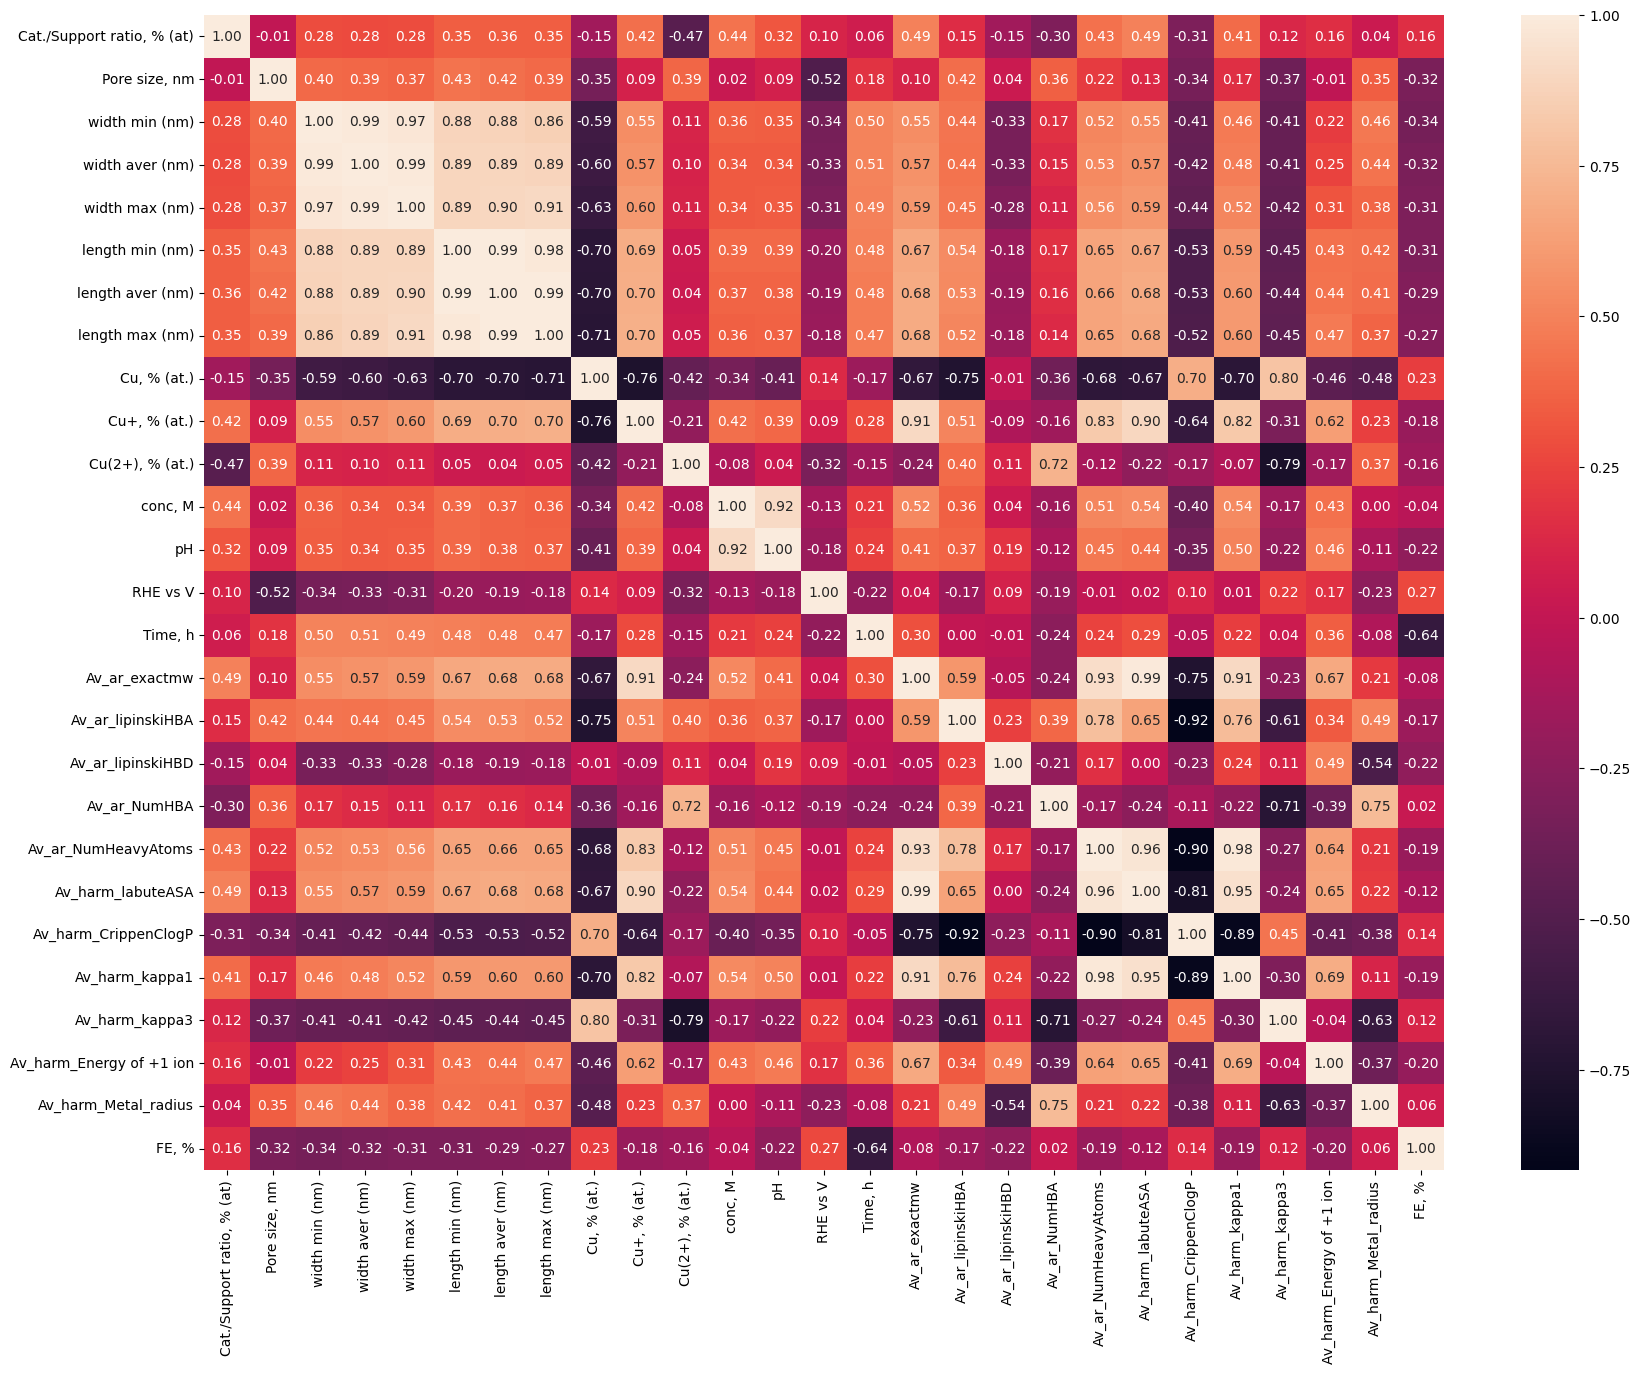

In [48]:
df_h2 = df[df['Product'] == "H2"].copy()
num_col = df_h2.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(20,15))
sns.heatmap(data=df_h2[num_col].corr(method="spearman"), annot=True, fmt=".2f", annot_kws={"size": 10})

1. Obtaining of H2 is correlated with reduced Cu
2. Overpotenial can be a reason of obtaining H2

In [49]:
fe_h2 = df_h2[num_col].corr(method="spearman")["FE, %"]

## CO

<Axes: >

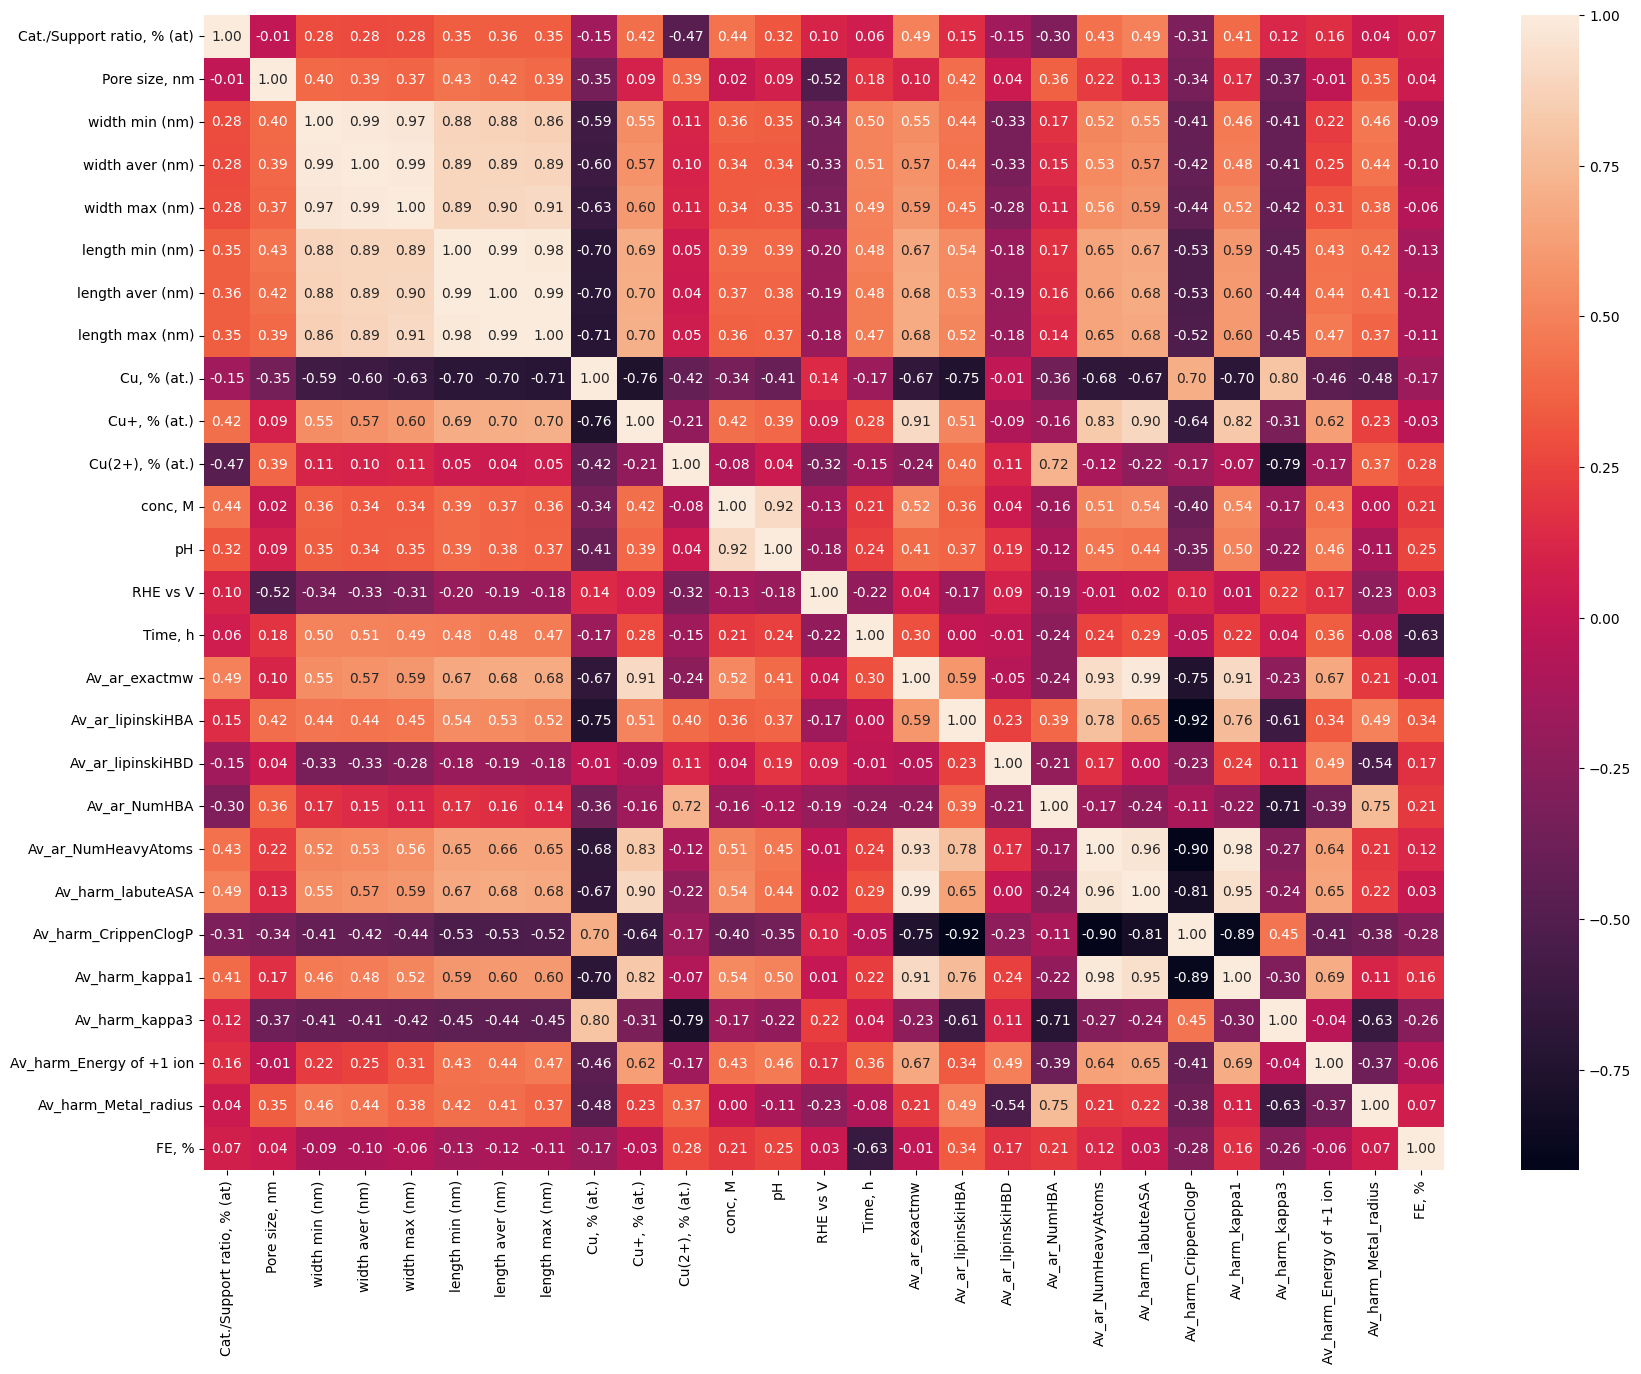

In [50]:
df_co = df[df['Product'] == "CO"].copy()
num_col = df_co.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(20,15))
sns.heatmap(data=df_co[num_col].corr(method="spearman"), annot=True, fmt=".2f", annot_kws={"size": 10})

In [51]:
fe_co = df_co[num_col].corr(method="spearman")["FE, %"]

## CH4

<Axes: >

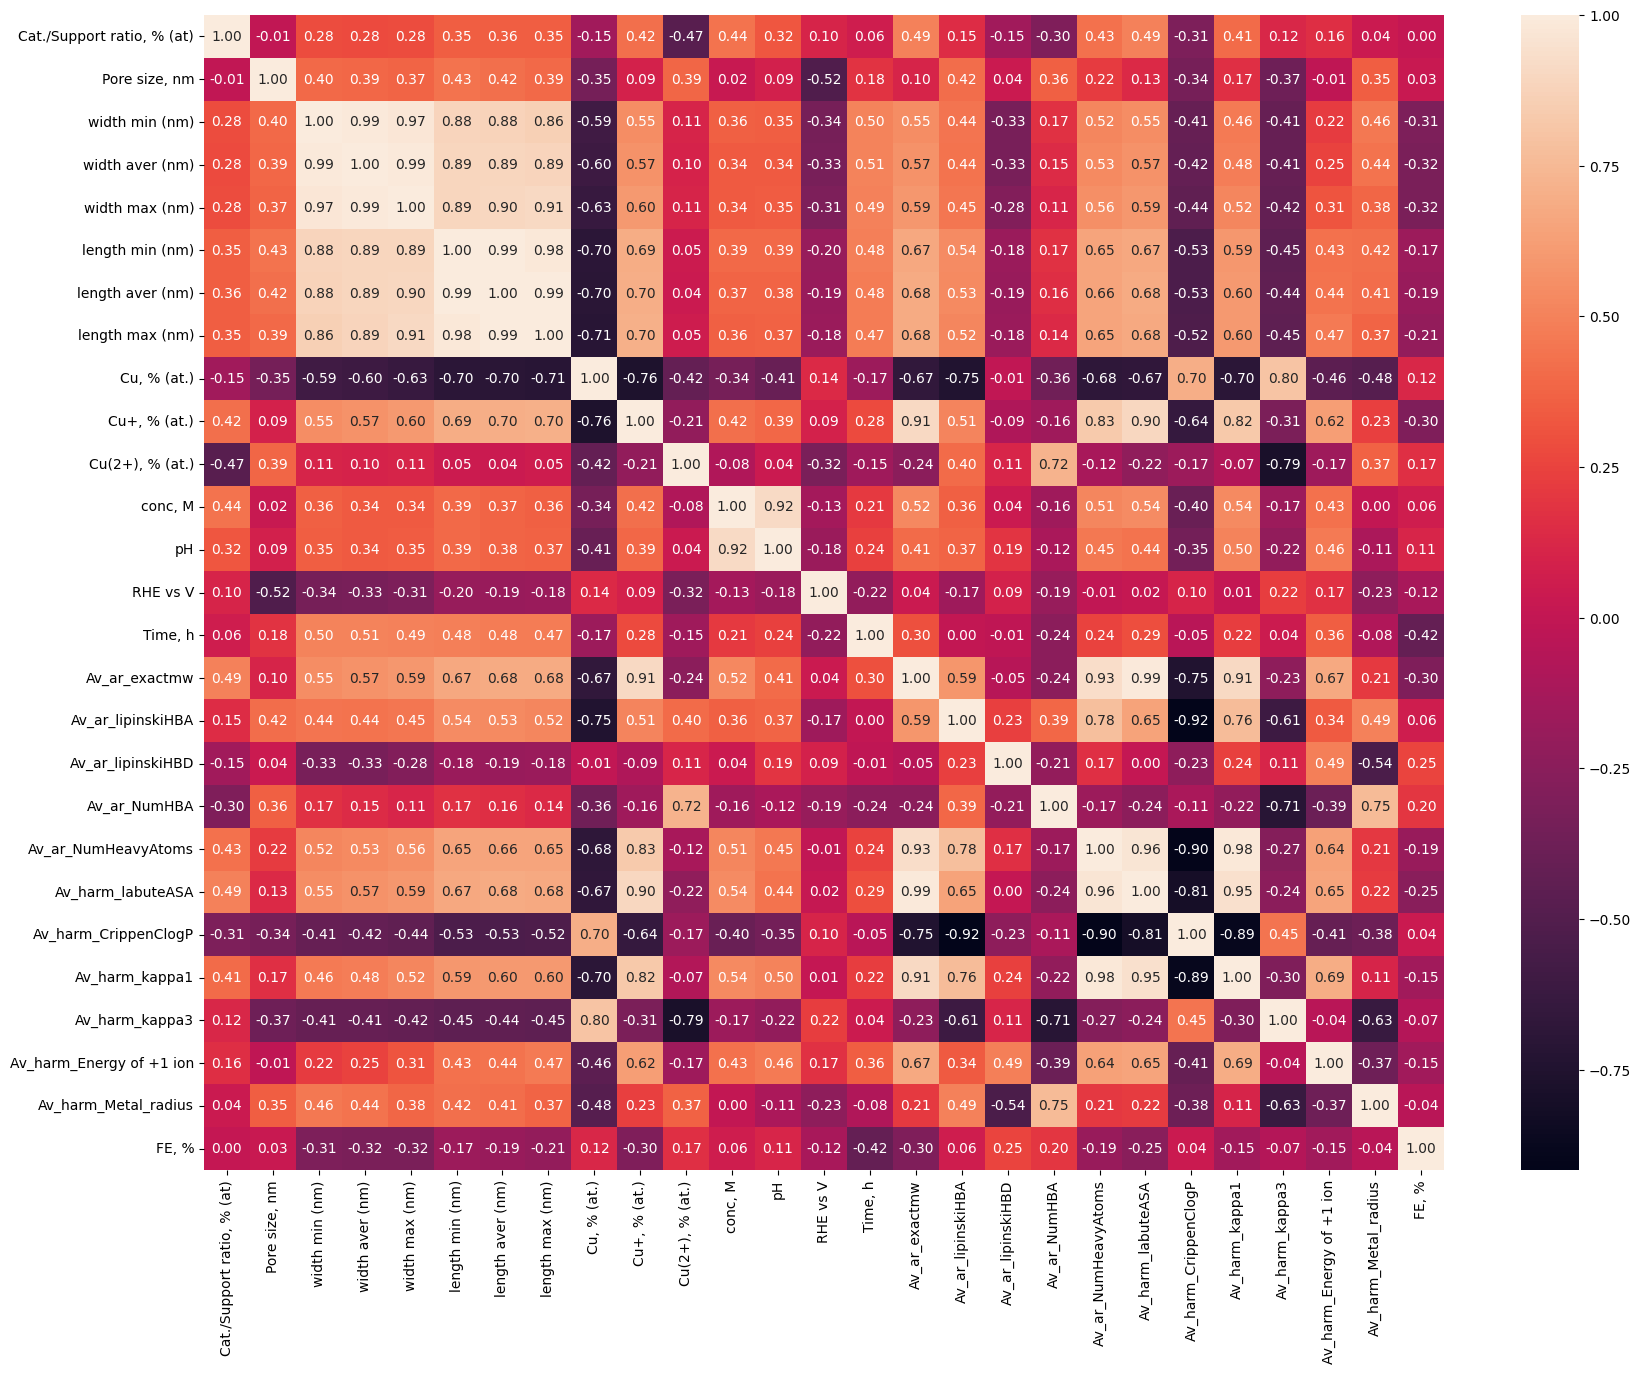

In [52]:
df_ch4 = df[df['Product'] == "CH4"].copy()
num_col = df_ch4.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(20,15))
sns.heatmap(data=df_ch4[num_col].corr(method="spearman"), annot=True, fmt=".2f", annot_kws={"size": 10})

In [53]:
fe_ch4 = df_ch4[num_col].corr(method="spearman")["FE, %"]

In [54]:
df_ch4[num_col].corr(method="spearman").index

Index(['Cat./Support ratio, % (at)', 'Pore size, nm', 'width min (nm)',
       'width aver (nm)', 'width max (nm)', 'length min (nm)',
       'length aver (nm)', 'length max (nm)', 'Cu, % (at.)', 'Cu+, % (at.)',
       'Cu(2+), % (at.)', 'conc, M', 'pH', 'RHE vs V', 'Time, h',
       'Av_ar_exactmw', 'Av_ar_lipinskiHBA', 'Av_ar_lipinskiHBD',
       'Av_ar_NumHBA', 'Av_ar_NumHeavyAtoms', 'Av_harm_labuteASA',
       'Av_harm_CrippenClogP', 'Av_harm_kappa1', 'Av_harm_kappa3',
       'Av_harm_Energy of +1 ion', 'Av_harm_Metal_radius', 'FE, %'],
      dtype='object')

## Correlation cofficients comparison

<Axes: >

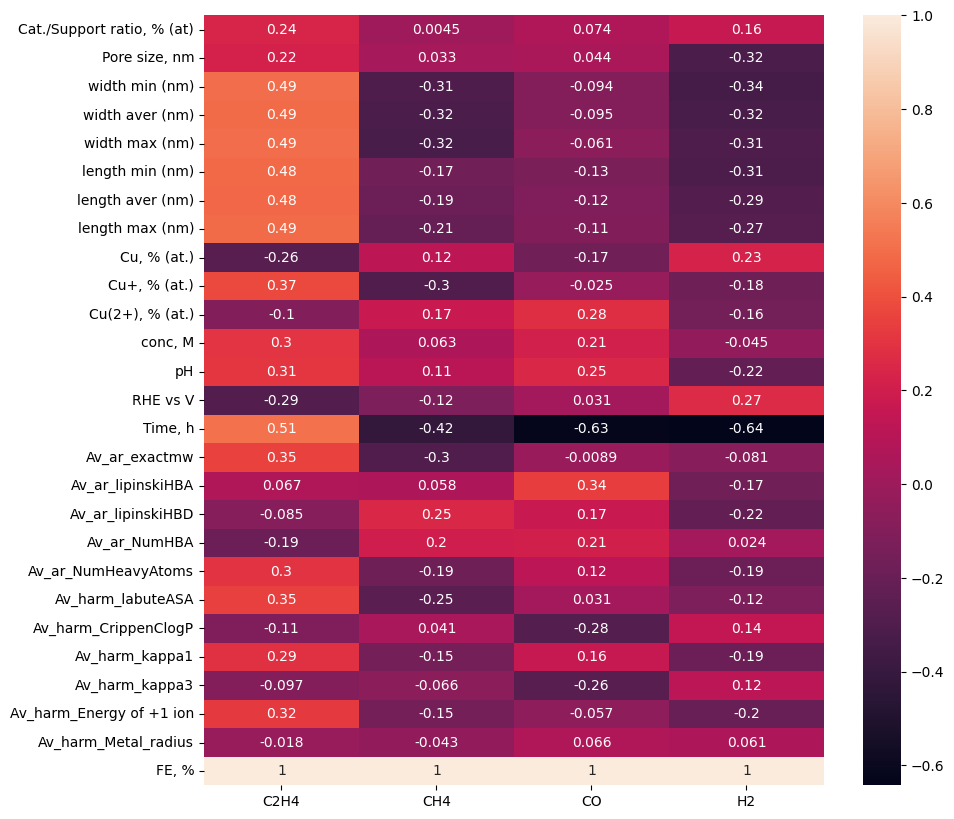

In [64]:
corr_comp = pd.concat([fe_c2h4, fe_ch4, fe_co, fe_h2], axis=1)
corr_comp = corr_comp.set_axis(["C2H4", "CH4", "CO", "H2"], axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_comp, annot=True)

Sum up:
1. Oxidised copper is more prone to the formation of ethylene, but oxidation degree 2 favours the formation of methane carbon monoxide
2. it seems that larger catalyst particles favour the formation of ethylene over other products
3. Catalysts with higher ionisation energy are more likely to form ethylene